Study on Heart Disease Database

Introduction:
Heart disease affects millions of people every year. In order to help prevent and potentially save lives, it is important to predict what can help prevent and detect these diseases in the early stages. With database we are using, we aim to investigate the relationship between different factors such as age, sex, number of major blood vessels colored by fluoroscopy, resting blood pressure, maximum heart rate achieved, cholesterol, and percentage of narrowing in any major vessel (condition). The condition can be 0, which means the patient has no heart disease, and 1, which means the patient does have heart disease.

The question we will be answering with this project is: how do age, resting blood pressure, maximum heart rate achieved, and cholesterol influence the percentage of narrowing of in any major vessel (condition)?

The dataset we will utilize is "Study on Heart Disease Database” from "https://archive.ics.uci.edu/dataset/45/heart+disease". For our analysis, we'll primarily be focusing on the Cleveland database. The data that we will be using has already been cleared of all N/A values. 

In [1]:
install.packages("kknn")
library(kknn)
library(repr)
library(tidyverse)
library(tidymodels)
set.seed(1120)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

These are the general packages needed to run our code. 

In [7]:
cleveland <- read_csv("https://raw.githubusercontent.com/ChristianGoncalvesOG/DSCI-100-009-013/main/heart_cleveland_upload.csv")

head(cleveland, n = 3)

Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0


In [8]:
cleveland_selected <- cleveland |>
    select(age, sex, ca, trestbps, thalach, chol, condition) |>
    mutate(condition = as_factor(condition)) |>
    na.omit()

head(cleveland_selected, n = 3)

age,sex,ca,trestbps,thalach,chol,condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
69,1,1,160,131,234,0
69,0,2,140,151,239,0
66,0,0,150,114,226,0


An important thing to note is our data set is already in tidy format, so we didn't need to wrangle it into tidy format. Our first step after reading in the data set was to select only the variable we care about, which are age, sex, ca (number of major blood vessels), trestbps (resting blood pressure when the patient was admitted to the hospital), thalach (the maximum heart rate achieved), cholesterol, and the condition of the patient (heart disease or not). Next, we mutated condition to be a factor, as that's what we are interested in predicting. We also cleared all possiblities of N/A values existing in this set. 

In [4]:
cleveland_split <- initial_split(cleveland_selected, prop = 0.75, strata = condition)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

The data set was then split into training and test, with 75% being for training and 25% for testing.

In [5]:
cleveland_table_sum <- cleveland_train |>
    group_by(condition) |>
    summarize(numOfRows = n())

cleveland_table_mean <- cleveland_train |>
    group_by(condition) |>
    select(age, trestbps, chol, thalach) |>
    summarize(average_age = mean(age), average_trestbps = mean(trestbps), average_chol = mean(chol), average_thalach = mean(thalach))

cleveland_table <- cleveland_table_sum |>
    full_join(cleveland_table_mean)

cleveland_table
#Generating the table

Adding missing grouping variables: `condition`
Joining with `by = join_by(condition)`


condition,numOfRows,average_age,average_trestbps,average_chol,average_thalach
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,120,52.17500,129.0000,239.1250,157.0417
1,102,57.37255,135.8235,254.4902,137.4706


Next, we decided to make a table to show the average values for each of the conditions (has heart disease and does not). First, using our training data we grouped by the condition as that's the predictive variable we care about. Then we also summarized to find the number of rows of each of the values. After this we collected the mean of all the variables we cared about. An important thing to note is while doing this we realized that sex and ca are not good variable to use in our classification model, as both of them only have a set amount of values they can be, and we haven't learned how to make models with these. So instead we averaged all of the other values, which have a range of values they can be, grouping by condition. Lastly, using full_join we joined both of these tables together to create the table above!

In [6]:
cleveland_graph <- ggplot(cleveland_train, aes(x = age, y = chol, color = condition)) +
                geom_point() + 
             labs(x = "Age \n(Years)", y = "Cholesterol \n (mg/dl)", color = "Condition") + ggtitle("Age vs Cholesterol")


In [7]:
cleveland_graph2 <- ggplot(cleveland_train, aes(x = trestbps, y = thalach, color = condition)) + 
            geom_point() + 
            labs(x = "Resting Blood Pressure \n (mm/Hg)", y = "The Maximum Heartrate Achieved \n (bpm)", color = "Condition") + ggtitle("Resting Blood Pressure vs Maximum Heartrate Achieved")


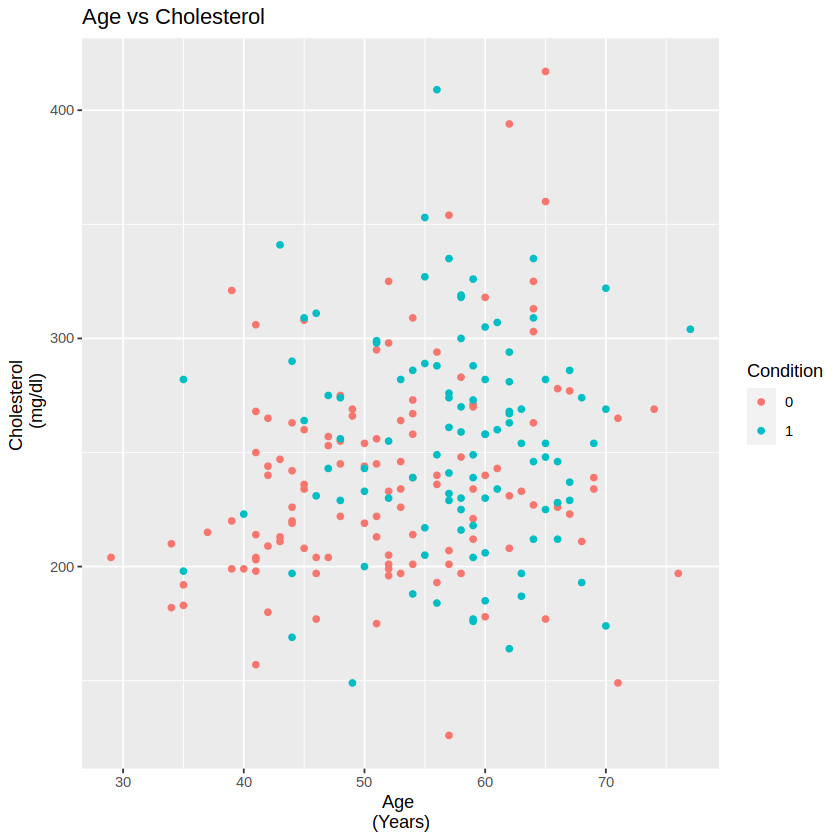

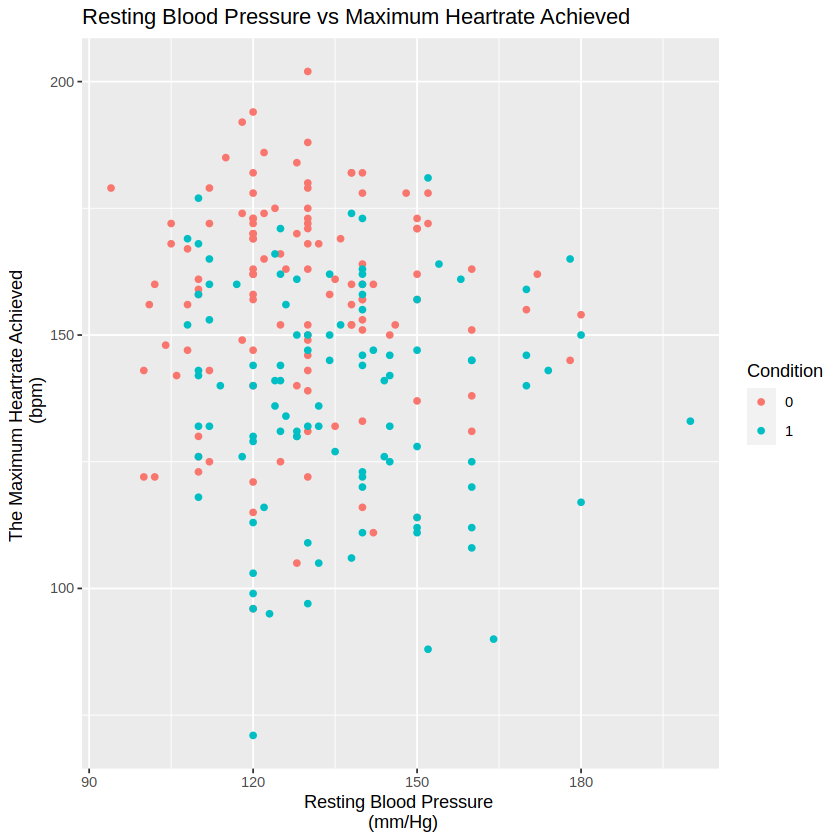

In [8]:
cleveland_graph
cleveland_graph2

In the first graph, of how age and cholesterol, there's less of a clear difference between condition 0 and 1. Most of the individual plots are quite close to each other, and there's no clear distinction or certain area where there's more of condition 0 or 1. One could say that condition 0's age is slightly younger than condition 1, however we would say it's not enough to show any big relationship between these variables. In the second graph of resting blood pressure and maximum heart rate there's a bit of a stronger distinction. Condition 1 seems to be more focused in the bottom right, where as condition 0 is more in the top left. This means that graph 2 would be better to do a classification model with than the second graph.

We expect to find the relationship of how ones condition is impacted by age and one other variable, such as blood pressure, cholesterol, and max heart rate achieved. 

In [23]:
cleveland_test_k <- tibble(neighbors = seq(1,20,1))
cleveland_fold <- vfold_cv(cleveland_train, 5, strata = condition)

cleveland_recipe <- recipe(condition ~ trestbps + thalach + chol, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

cleveland_kknn <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

cleveland_fit <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(cleveland_kknn) |>
    tune_grid(resamples = cleveland_fold, grid = 10)

cleveland_results <- cleveland_fit |>
    collect_metrics() |>
    filter(.metric == "accuracy")
cleveland_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5725253,5,0.02932539,Preprocessor1_Model01
3,accuracy,binary,0.6129293,5,0.02483729,Preprocessor1_Model02
4,accuracy,binary,0.6129293,5,0.02483729,Preprocessor1_Model03
6,accuracy,binary,0.6174747,5,0.02314851,Preprocessor1_Model04
7,accuracy,binary,0.5989899,5,0.02323232,Preprocessor1_Model05
9,accuracy,binary,0.6171717,5,0.04025509,Preprocessor1_Model06
10,accuracy,binary,0.6171717,5,0.04025509,Preprocessor1_Model07
11,accuracy,binary,0.6083838,5,0.02871229,Preprocessor1_Model08
13,accuracy,binary,0.6170707,5,0.01421105,Preprocessor1_Model09


Discuss the code

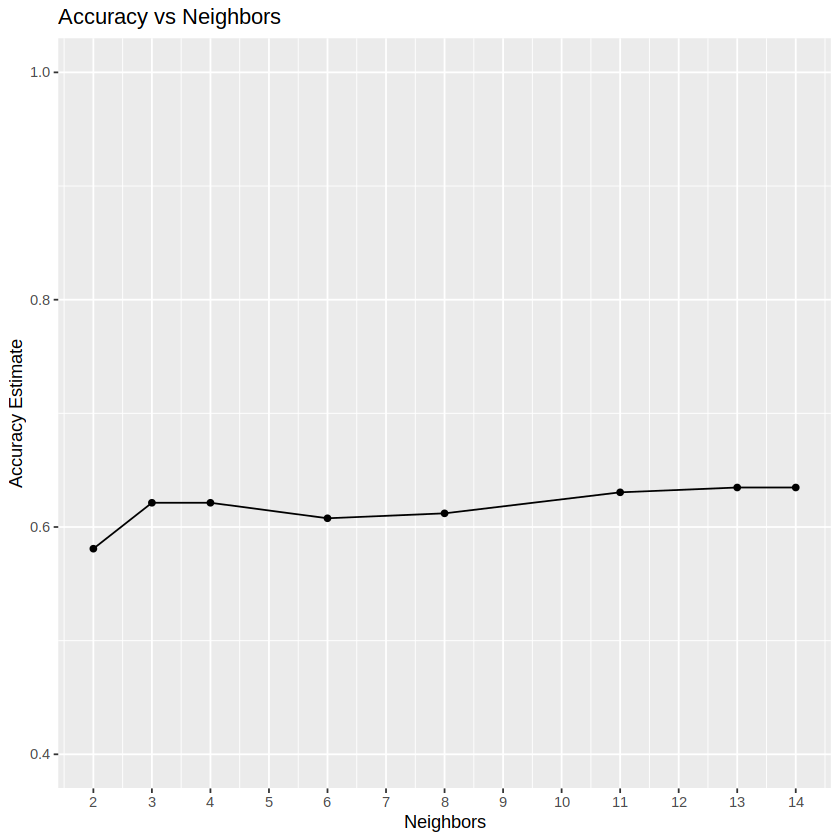

In [22]:
cleveland_accuracy_plot <- ggplot(cleveland_results, aes(x = neighbors, y = mean)) + geom_point() + geom_line() + labs(x = "Neighbors", y = "Accuracy Estimate") + scale_x_continuous(breaks = seq(0, 14, by = 1)) + scale_y_continuous(limits = c(0.4, 1.0)) + ggtitle("Accuracy vs Neighbors")
cleveland_accuracy_plot

In [28]:
cleveland_best_kknn <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

cleveland_better_fit <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(cleveland_best_kknn) |>
    fit(cleveland_train)

cleveland_test_predictions <- predict(cleveland_better_fit, cleveland_test) |>
                        bind_cols(cleveland_test)

cleveland_conf_mat <- cleveland_test_predictions |>
    conf_mat(truth = condition, estimate = .pred_class)
cleveland_conf_mat

          Truth
Prediction  0  1
         0 30 18
         1 10 17

Some impacts that these findings could lead to could be that more people will be aware of likely they are to get a heart disease and how their living habits could affect it. Therefore, they could be more careful of their health, specifically the health of their heart.  
Heart disease findings often influence the development of clinical guidelines for healthcare providers. These guidelines can help standardize the best practices for the management and treatment of heart disease. Understanding the risk factors and causes of heart disease can lead to the development of more effective prevention strategies. This can include lifestyle changes, medications, and public health initiatives to reduce the prevalence of heart disease.

This data analysis could lead to more future questions.
As we know which groups of people would be more likely to get heart disease, we can find some methods to prevent it. Another question could be whether the countries where the data is recorded affect the chances of condition being 0 or 1. We can also think about what are the most effective lifestyle interventions to prevent heart disease? Researchers may explore the ideal diet, exercise routines, stress management techniques, and behavioral interventions. *Add how we chose the variables from the plots*